Anggota Kelompok 2
1. Arya Bagus Putra Pratama (04)
2. Bimantara Dwi Cahyo (07)
3. Hanief Mochsin (15)
4. Maulita Yasmin Nadila (18)
5. Yusriyah Firjatullah (27)

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

**Open Challange** (Opsional)
 - Bagaimana cara melakukan evaluasi pada hasil segementasi?
 - Terapkan pada kasus ini!


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Library

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os


Select 5 License Plate Images from The Dataset

In [ ]:
image_paths = [
    "/content/drive/MyDrive/Mesin Learning/plat1.jpg",
    "/content/drive/MyDrive/Mesin Learning/plat2.jpg",
    "/content/drive/MyDrive/Mesin Learning/plat3.jpg",
    "/content/drive/MyDrive/Mesin Learning/plat4.jpg",
    "/content/drive/MyDrive/Mesin Learning/plat5.jpg"
]


Displays 5 Selected License Plate Images

In [ ]:
def show_images(images, titles, figsize=(15, 7)):
    plt.figure(figsize=figsize)
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

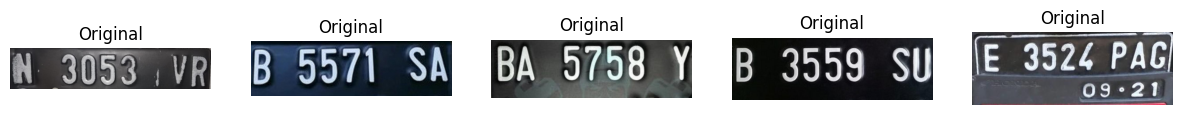

In [ ]:
# Load and display selected images before segmentation
original_images = [cv2.imread(img) for img in image_paths]

# Displays the original image with the title "Original" (in RGB format)
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for ax, image in zip(axes, original_images):
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(rgb_image)
    ax.set_title('Original')
    ax.axis('off')
plt.show()

PLAT 1

Load Image

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Mesin Learning/plat1.jpg')

Displays The Height, Width, and Number of Image Channels

In [ ]:
h, w, ch = img.shape
print(h)
print(w)
print(ch)

259
1280
3



Image Normalization

In [ ]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(331520, 3)

RGB Color Space Plot

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

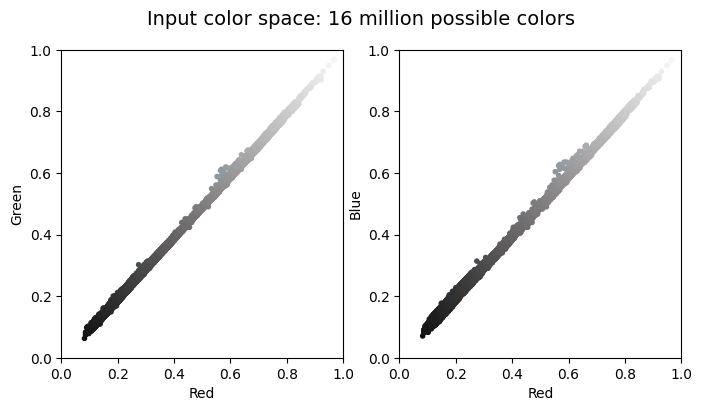

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

Image Segmentation Using The K-Means Algorithm

In [ ]:
from sklearn.cluster import KMeans

# Reshape image into 2D array (for K-Means)
citra_reshape = img.reshape((-1, 3))

# Determine the desired number of clusters
jumlah_klaster = 2

kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Move the cluster labels back to their original shape
label_klaster = kmeans.labels_.reshape(img.shape[:2])

# For example, you can show the first cluster (0) as red
citra_segmentasi = img.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]


Segmentation Results

Text(0.5, 1.0, '2-color Image')

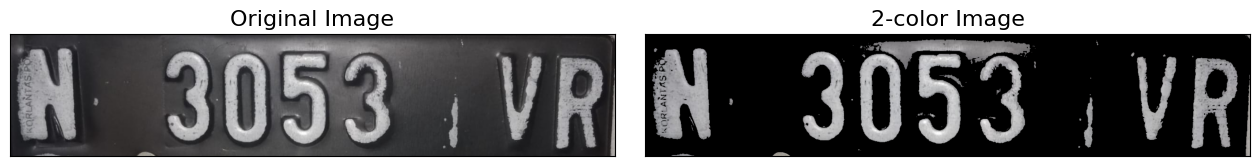

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

Mengevaluasi hasil segmentasi menggunakan Jaccard Index dan Dice Coefficient:

In [ ]:
from sklearn.metrics import jaccard_score, f1_score

# Example of ground truth mask (replace with your actual mask)
# Assuming ground_truth_mask and label_klaster are binary arrays of the same shape
ground_truth_mask = (label_klaster == 1)  # example ground truth cluster

# Flatten the arrays for comparison
flattened_pred = label_klaster.flatten()
flattened_truth = ground_truth_mask.flatten()

# Calculate Jaccard and Dice coefficients
jaccard = jaccard_score(flattened_truth, flattened_pred, average='binary')
dice = f1_score(flattened_truth, flattened_pred, average='binary')  # Dice is the same as F1 score for binary data

print("Jaccard Index:", jaccard)
print("Dice Coefficient:", dice)

Jaccard Index: 1.0
Dice Coefficient: 1.0


PLAT 2

Load Image

In [ ]:
img2 = cv2.imread('/content/drive/MyDrive/Mesin Learning/plat2.jpg')


Displays The Height, Width, and Number of Image Channels

In [ ]:
h, w, ch = img2.shape
print(h)
print(w)
print(ch)

359
1297
3


Image Normalization

In [ ]:
data = img2 / 255.0
data = data.reshape(h * w, ch)
data.shape

(465623, 3)

RGB Color Space Plot

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

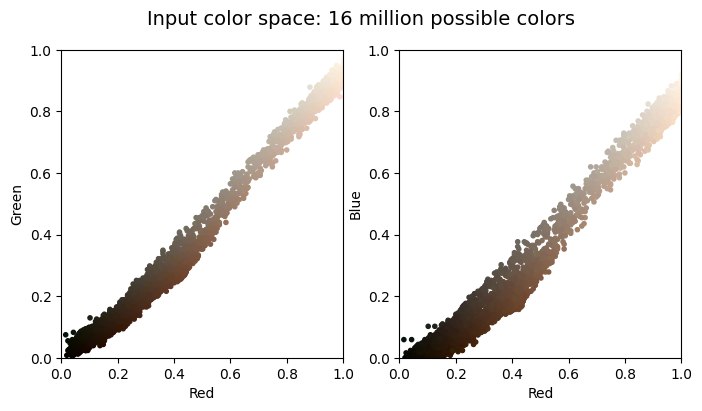

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

Image Segmentation Using The K-Means Algorithm

In [ ]:
from sklearn.cluster import KMeans

# Reshape image into 2D array (for K-Means)
citra_reshape = img2.reshape((-1, 3))

# Determine the desired number of clusters
jumlah_klaster = 2

kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Move the cluster labels back to their original shape
label_klaster = kmeans.labels_.reshape(img2.shape[:2])

# For example, you can show the first cluster (0) as red
citra_segmentasi = img2.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]


Segmentation Results

Text(0.5, 1.0, '2-color Image')

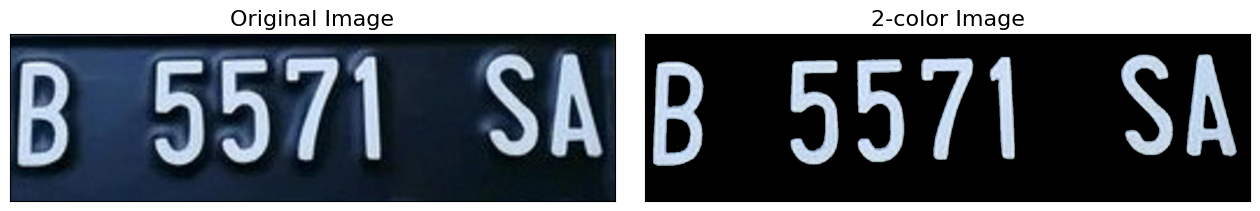

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

Mengevaluasi hasil segmentasi menggunakan Jaccard Index dan Dice Coefficient:

In [ ]:
from sklearn.metrics import jaccard_score, f1_score

# Example of ground truth mask (replace with your actual mask)
# Assuming ground_truth_mask and label_klaster are binary arrays of the same shape
ground_truth_mask = (label_klaster == 1)  # example ground truth cluster

# Flatten the arrays for comparison
flattened_pred = label_klaster.flatten()
flattened_truth = ground_truth_mask.flatten()

# Calculate Jaccard and Dice coefficients
jaccard = jaccard_score(flattened_truth, flattened_pred, average='binary')
dice = f1_score(flattened_truth, flattened_pred, average='binary')  # Dice is the same as F1 score for binary data

print("Jaccard Index:", jaccard)
print("Dice Coefficient:", dice)

Jaccard Index: 1.0
Dice Coefficient: 1.0


PLAT 3

Load Image

In [ ]:
img3 = cv2.imread('/content/drive/MyDrive/Mesin Learning/plat3.jpg')

Displays The Height, Width, and Number of Image Channels

In [ ]:
h, w, ch = img3.shape
print(h)
print(w)
print(ch)

343
1183
3



Image Normalization

In [ ]:
data = img3 / 255.0
data = data.reshape(h * w, ch)
data.shape

(405769, 3)


RGB Color Space Plot

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

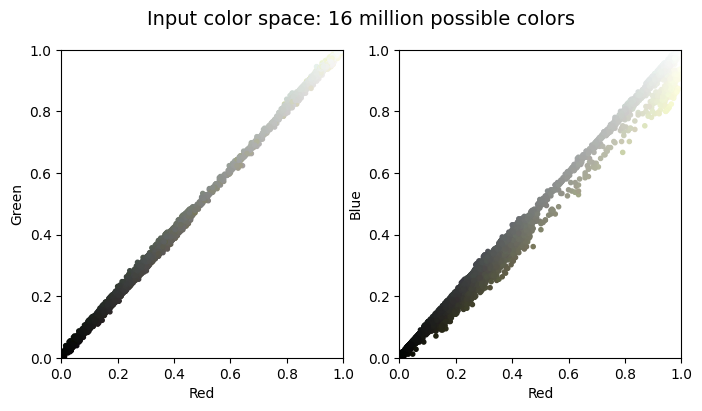

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')


Image Segmentation Using The K-Means Algorithm

In [ ]:
from sklearn.cluster import KMeans

# Reshape image into 2D array (for K-Means)
citra_reshape = img3.reshape((-1, 3))

# Determine the desired number of clusters
jumlah_klaster = 2

kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Move the cluster labels back to their original shape
label_klaster = kmeans.labels_.reshape(img3.shape[:2])

# For example, you can show the first cluster (0) as red
citra_segmentasi = img3.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]


Segmentation Results

Text(0.5, 1.0, '2-color Image')

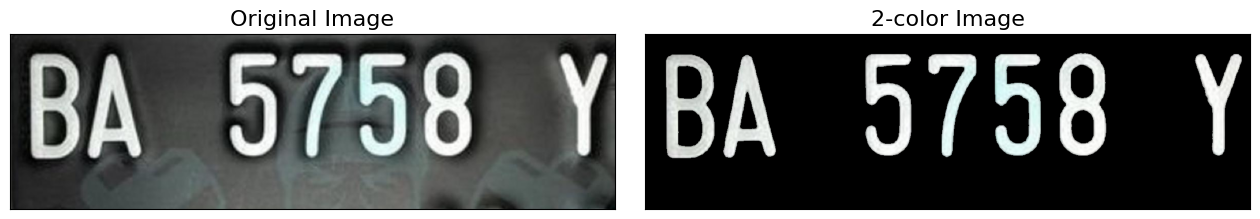

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

Mengevaluasi hasil segmentasi menggunakan Jaccard Index dan Dice Coefficient:

In [ ]:
from sklearn.metrics import jaccard_score, f1_score

# Example of ground truth mask (replace with your actual mask)
# Assuming ground_truth_mask and label_klaster are binary arrays of the same shape
ground_truth_mask = (label_klaster == 1)  # example ground truth cluster

# Flatten the arrays for comparison
flattened_pred = label_klaster.flatten()
flattened_truth = ground_truth_mask.flatten()

# Calculate Jaccard and Dice coefficients
jaccard = jaccard_score(flattened_truth, flattened_pred, average='binary')
dice = f1_score(flattened_truth, flattened_pred, average='binary')  # Dice is the same as F1 score for binary data

print("Jaccard Index:", jaccard)
print("Dice Coefficient:", dice)

Jaccard Index: 1.0
Dice Coefficient: 1.0


PLAT 4

Load Image

In [ ]:
img4 = cv2.imread('/content/drive/MyDrive/Mesin Learning/plat4.jpg')

Displays The Height, Width, and Number of Image Channels

In [ ]:
h, w, ch = img4.shape
print(h)
print(w)
print(ch)

281
908
3


Image Normalization

In [ ]:
data = img4 / 255.0
data = data.reshape(h * w, ch)
data.shape

(255148, 3)


RGB Color Space Plot

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

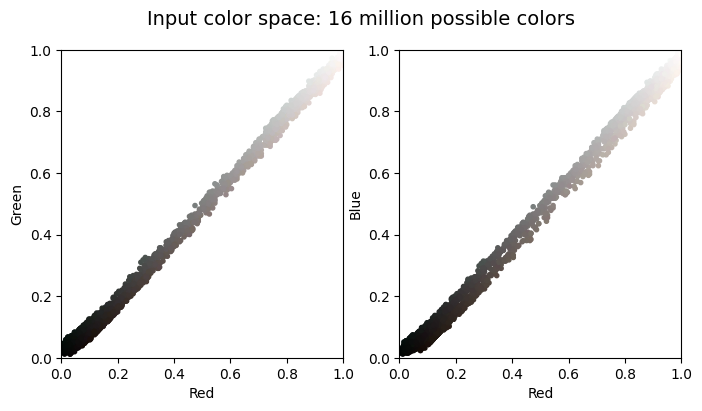

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')


Image Segmentation Using The K-Means Algorithm

In [ ]:
# Reshape image into 2D array (for K-Means)
citra_reshape = img4.reshape((-1, 3))

# Determine the desired number of clusters
jumlah_klaster = 2

kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Move the cluster labels back to their original shape
label_klaster = kmeans.labels_.reshape(img4.shape[:2])

# For example, you can show the first cluster (0) as red
citra_segmentasi = img4.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]

Segmentation Results

Text(0.5, 1.0, '2-color Image')

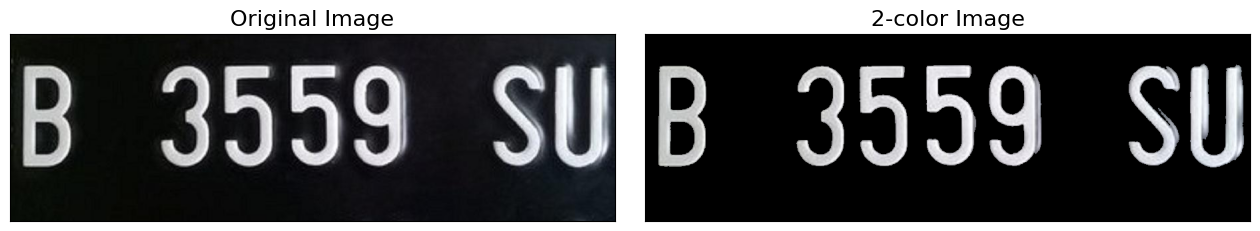

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

Mengevaluasi hasil segmentasi menggunakan Jaccard Index dan Dice Coefficient:

In [ ]:
from sklearn.metrics import jaccard_score, f1_score

# Example of ground truth mask (replace with your actual mask)
# Assuming ground_truth_mask and label_klaster are binary arrays of the same shape
ground_truth_mask = (label_klaster == 1)  # example ground truth cluster

# Flatten the arrays for comparison
flattened_pred = label_klaster.flatten()
flattened_truth = ground_truth_mask.flatten()

# Calculate Jaccard and Dice coefficients
jaccard = jaccard_score(flattened_truth, flattened_pred, average='binary')
dice = f1_score(flattened_truth, flattened_pred, average='binary')  # Dice is the same as F1 score for binary data

print("Jaccard Index:", jaccard)
print("Dice Coefficient:", dice)

Jaccard Index: 1.0
Dice Coefficient: 1.0


Plat 5

Load Image

In [ ]:
img5 = cv2.imread('/content/drive/MyDrive/Mesin Learning/plat5.jpg')


Displays The Height, Width, and Number of Image Channels

In [ ]:
h, w, ch = img5.shape
print(h)
print(w)
print(ch)

165
455
3



Image Normalization

In [ ]:
data = img5 / 255.0
data = data.reshape(h * w, ch)
data.shape

(75075, 3)


RGB Color Space Plot

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

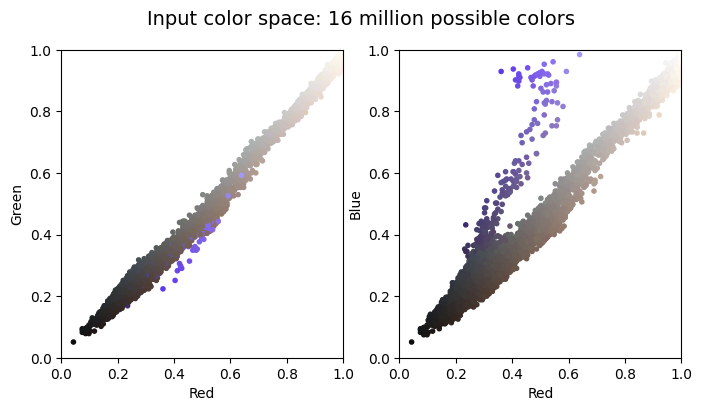

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

Image Segmentation Using The K-Means Algorithm

In [ ]:
from sklearn.cluster import KMeans

# Reshape image into 2D array (for K-Means)
citra_reshape = img5.reshape((-1, 3))

# Determine the desired number of clusters
jumlah_klaster = 2

kmeans = KMeans(n_clusters=jumlah_klaster)
kmeans.fit(citra_reshape)

# Move the cluster labels back to their original shape
label_klaster = kmeans.labels_.reshape(img5.shape[:2])

# For example, you can show the first cluster (0) as red
citra_segmentasi = img5.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]

Segmentation Results

Text(0.5, 1.0, '2-color Image')

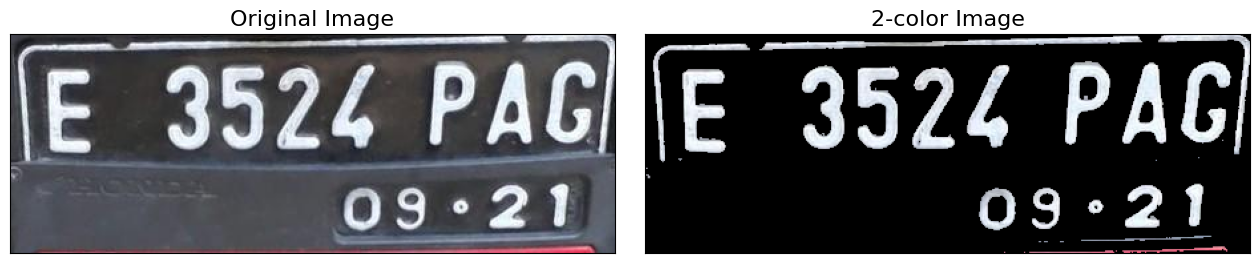

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

Mengevaluasi hasil segmentasi menggunakan Jaccard Index dan Dice Coefficient:

In [ ]:
from sklearn.metrics import jaccard_score, f1_score

# Example of ground truth mask (replace with your actual mask)
# Assuming ground_truth_mask and label_klaster are binary arrays of the same shape
ground_truth_mask = (label_klaster == 1)  # example ground truth cluster

# Flatten the arrays for comparison
flattened_pred = label_klaster.flatten()
flattened_truth = ground_truth_mask.flatten()

# Calculate Jaccard and Dice coefficients
jaccard = jaccard_score(flattened_truth, flattened_pred, average='binary')
dice = f1_score(flattened_truth, flattened_pred, average='binary')  # Dice is the same as F1 score for binary data

print("Jaccard Index:", jaccard)
print("Dice Coefficient:", dice)

Jaccard Index: 1.0
Dice Coefficient: 1.0
